In this dataset we have a multilabel classification problem - predicting genre (of which a movie can be of many genres) from its poster

However, more than the, we effectively have **two** different datasets- one being the full dataset of movie information + links from the CSV file, and the other being the images of the posters we have been provided.

In this notebook we will look at

 - **Basic Label Analysis** (Total Movies, Total Genres, Average Score by Genre, Number of Movies per Genre)- both for the full and sample datasets
   
 - **Basic Image Analysis** (Sample Images, Size of Images, Average RGB Value by Genre)

(Small Note- I am something of a novice at pandas + using ipynb  - this is actually my first ipynb. Hence much of this code has been heavily based on online guides and previous EDAs, particularly [this][1] and [this][2] )

Version 1- June 11th, 2017 (errors may still be present, has not been extensively tested)


#Basic Label Analysis of Full Dataset
First, we shall analyze the full dataset as defined by the CSV


  [1]: https://www.kaggle.com/philschmidt/cervix-eda-model-selection
  [2]: https://pythonspot.com/en/matplotlib-bar-chart/

In [1]:
import numpy as np 
import pandas as pd 
from scipy import misc
import matplotlib.pyplot as plt

movies = pd.read_csv("input/MovieGenre.csv",encoding="ISO-8859-1")

#Print the label categories we are working with
print(movies.columns)


#Print the total amount of movies in the dataset
print("Total Number of Movies is: " + str(len(movies.index)))

#We will count the number of movies with a specific genre
genrelist = []
length = len(movies)
for n in range(0,length):
    genres = str(movies.loc[n]["Genre"])
    genres = genres.split("|")
    genrelist.extend(genres)
    
#We will also display number of Genres     
unique_genres = list(set(genrelist))
print("Total Number of Genres is: " + str(len(unique_genres)))

Index(['imdbId', 'Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster'], dtype='object')
Total Number of Movies is: 40108
Total Number of Genres is: 29


Family 2100
Crime 5270
Short 1066
Western 853
Reality-TV 2
Horror 3990
News 83
Thriller 4816
Sport 707
Action 5331
Adventure 3829
History 1426
Musical 845
War 1173
Film-Noir 403
Music 1292
Documentary 3882
Game-Show 1
Mystery 2395
Adult 14
Comedy 12682
Talk-Show 7
Sci-Fi 2020
nan 145
Animation 1750
Fantasy 2012
Romance 6224
Biography 1999
Drama 20053


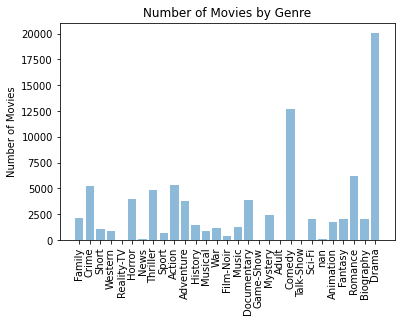

In [2]:
#Print amount of movies with specific genre
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

Family 6.32
Crime 6.46
Short 6.99
Western 6.36
Reality-TV 5.70
Horror 5.35
News 7.29
Thriller 5.92
Sport 6.59
Action 5.98
Adventure 6.29
History 7.09
Musical 6.61
War 6.91
Film-Noir 6.96
Music 6.76
Documentary 7.28
Game-Show 5.50
Mystery 6.30
Adult 4.75
Comedy 6.28
Talk-Show 7.93
Sci-Fi 5.52
nan nan
Animation 6.83
Fantasy 6.16
Romance 6.52
Biography 7.06
Drama 6.65


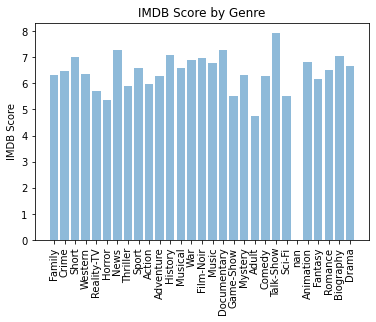

In [3]:
# We will also find the average score by genre
avglist = []
for genre in unique_genres:
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    avg = movies_of_genre["IMDB Score"].mean()
    avglist.append(avg)
    print(genre + " {0:.2f}".format(avg))

plt.bar(y_pos,avglist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("IMDB Score")
plt.title("IMDB Score by Genre")
plt.show()

# Label Analysis of Sample Dataset

Next, we will analyze the sample dataset

In [4]:
path = 'input/SampleMoviePosters'
from glob import glob
all_posters = sorted(glob(path + '/*'))
all_posters = pd.DataFrame({'path' : all_posters})
all_posters['filetype'] = all_posters.apply(lambda row: row.path.split(".")[-1],axis=1)
all_posters['ID'] = all_posters.apply(lambda row: row.path.split("/")[-1],axis=1)
all_posters['ID'] = (all_posters['ID'].apply(lambda row: row.split(".")[0])).apply(np.int64)
all_posters.head()

ValueError: invalid literal for int() with base 10: 'SampleMoviePosters\\10040'

In [ ]:
poster_ID = all_posters["ID"].values.tolist()
movies["imdbId"] = movies["imdbId"].astype(np.int64)

movies = movies[movies['imdbId'].isin(all_posters["ID"])]

#Count unique genres again
genrelist = []
for n in range(0,length):
    try:
        genres = str(movies.loc[n]["Genre"])
        genres = genres.split("|")
        genrelist.extend(genres)
    except:
        q=1
        
unique_genres = list(set(genrelist))
num_genres = len(unique_genres)
print("Total Number of Movies is : {}".format(len(movies)))
print("Total Number of Unique Genres is : {}".format(num_genres))

In [ ]:
#Print amount of movies with specific genre
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

In [ ]:
# We will also find the average score by genre
avglist = []
for genre in unique_genres:
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    avg = movies_of_genre["IMDB Score"].mean()
    avglist.append(avg)
    print(genre + " {0:.2f}".format(avg))

plt.bar(y_pos,avglist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("IMDB Score")
plt.title("IMDB Score by Genre")
plt.show()


# Image Analysis
We will run these tests simply for the sample images provided

In [ ]:
#We display 1 movie of each genre
fig = plt.figure(figsize=(20,80))
i=1

for genre in unique_genres:
    ax = fig.add_subplot(10,3,i)
    i+=1
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    
    poster_ID = movies_of_genre["imdbId"].values.tolist()

    all_posters_subset = all_posters[all_posters["ID"].isin(poster_ID)]
    sample = all_posters_subset.values[0]
    plt.imshow(plt.imread(sample[0]))
    ID = sample[2]
    title_of_movie = movies_of_genre[movies_of_genre["imdbId"] == ID]["Title"]
    
    plt.title('Genre {}. Title: {}'.format(genre,title_of_movie.to_string()))

In [ ]:
from collections import defaultdict

indices = []
images = []
for _, row in movies.iterrows():
    try:
        path = all_posters[all_posters["ID"] == row["imdbId"]]['path'].values[0]
        img = misc.imread(path)
        images.append(img)
        indices.append(row["imdbId"])
    except:
        print('image read failed for {}'.format(path))

print("Images read in : {}".format(len(images)))
movie_im = pd.DataFrame(
        {
            'ID': indices,
            'images': images
        }
    )

In [ ]:
dfs = []
dfs = pd.DataFrame(
        {
            'rows': list(map(lambda i: i.shape[0], images)),
            'columns': list(map(lambda i: i.shape[1], images)),
            'channels': list(map(lambda i: i.shape[2], images))
        }
    )

df_grouped = dfs.groupby(by=['channels', 'columns', 'rows']).size().reset_index().sort_values(['channels', 0], ascending=False)
df_grouped

All of our images seem to have the same dims- we can check this with a random example

In [ ]:
import random
print(images[random.randint(0,1018)].shape == (268,182,3))

In [ ]:
#Next we will plot the average R,G,B, values for each genre
red_avg = []
blue_avg = []
green_avg = []

for genre in unique_genres:
    red = np.array([],dtype=np.uint8,ndmin=1)
    green = np.array([],dtype=np.uint8,ndmin=1)
    blue = np.array([],dtype=np.uint8,ndmin=1)
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    poster_ID = movies_of_genre["imdbId"].values.tolist()

    movie_im_subset = movie_im[movie_im["ID"].isin(poster_ID)]
    for _, row in movie_im_subset.iterrows():
        im = row['images']
        red = np.append(red,np.ravel(im[:,:,0]))
        green = np.append(red,np.ravel(im[:,:,1]))
        blue = np.append(red,np.ravel(im[:,:,2]))
    
    
    red_avg.append(np.average(red))
    green_avg.append(np.average(green))
    blue_avg.append(np.average(blue))

fig, ax = plt.subplots(figsize=(20,20))
index = np.arange(len(unique_genres))
bar_width = 0.2
opacity = 0.4
 
rects1 = plt.bar(index, red_avg, bar_width,
                 alpha=opacity,
                 color='#ff8080',
                 label='Red')
 
rects2 = plt.bar(index + bar_width, green_avg, bar_width,
                 alpha=opacity,
                 color='#39ac73',
                 label='Green')

rects3 = plt.bar(index + 2*bar_width, blue_avg, bar_width,
                 alpha=opacity,
                 color='#4d94ff',
                 label='Blue')
 
plt.xlabel('Genre',fontsize=30)
plt.ylabel('Average Intensity',fontsize=30)
plt.title('Color Intensity Averages by Genre',fontsize=50)
plt.xticks(index + bar_width, (unique_genres),rotation='vertical',fontsize=30)
plt.yticks(fontsize=20)
 
plt.tight_layout()
plt.show()    
    